<a href="https://colab.research.google.com/github/thebabycode/ML/blob/main/ML_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [ ]:
pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
df = pd.read_excel('/home/joseph/Desktop/ml lab/lab1/dataset/CCPP/Folds5x2_pp.xlsx')

In [ ]:
input = df.drop(['AP','V','RH'], axis=1)

In [ ]:
input = input.dropna()
#dropping the null values
input.head()
#printing the head

,AT,PE
0,14.96,463.26
1,25.18,444.37
2,5.11,488.56
3,20.86,446.48
4,10.82,473.90


In [ ]:
X = input.iloc[:, :-1].values
y = input.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

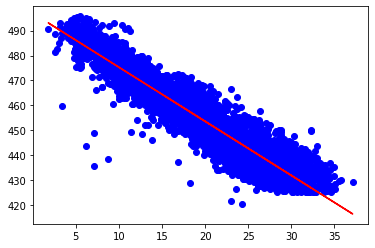

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')

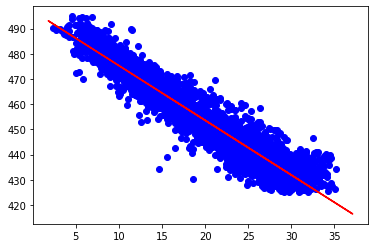

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.show()

In [ ]:
df = pd.read_csv('/home/joseph/Desktop/ml lab/lab1/dataset/hcvdat0.csv')

In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 'columns')
df = df.dropna()
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [ ]:
df.Category.value_counts(normalize = True)


0=Blood Donor             0.893039
3=Cirrhosis               0.040747
1=Hepatitis               0.033956
2=Fibrosis                0.020374
0s=suspect Blood Donor    0.011885
Name: Category, dtype: float64

In [ ]:
num_male = df.Sex.value_counts().loc['m']
num_female = df.Sex.value_counts().loc['f']
print('Number of males: {}'.format(num_male))
print('Number of females: {}'.format(num_female))

Number of males: 363
Number of females: 226


Largest part of my DataFrame is made of by healthy blood donors and only a rough 10% of people with the disease. This might be an issue for the accuracy later on in the model fitting, since that 10% is to be divided by all 3 possible stages of the disease. Male and female however in roughly 3 by 2 ratio

In [ ]:
df_grp = df.groupby(['Sex', 'Category'])


In [ ]:
print('Percentage of diseased females: {:.2%}'.format((num_female - len(df_grp.get_group(('f', '0=Blood Donor'))))/len(df_grp.get_group(('f', '0=Blood Donor')))))
print('Percentage of diseased males: {:.2%}'.format((num_male - len(df_grp.get_group(('m', '0=Blood Donor'))))/len(df_grp.get_group(('m', '0=Blood Donor')))))

Percentage of diseased females: 8.13%
Percentage of diseased males: 14.51%


In the above calculation i considered the worst case scenario where a "suspect blood donor" is considered as diseased. However they impact only for a 1% in total so negligible for the purpose of the study.

In [ ]:
df.describe() 

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,47.417657,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,9.931334,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,23.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,47.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,54.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_Category = LabelEncoder()
le_Sex = LabelEncoder()
dfle = df.copy()


dfle.Category = le_Category.fit_transform(dfle.Category)
dfle.Sex = le_Sex.fit_transform(dfle.Sex)

In [ ]:
X = dfle.drop(['Category'], axis = 'columns')
y = dfle.Category
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
608,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [ ]:
y


0      0
1      0
2      0
3      0
4      0
      ..
608    4
609    4
610    4
611    4
612    4
Name: Category, Length: 589, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:

model_param = {

    
    'LogisticRegression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'param': {
            'C': [1,5,10,15,20]
        }
        
    },
    
 
    'DecisionTreeClassifier':{
        'model': DecisionTreeClassifier(),
        'param': {
            'criterion': ['gini','entropy'],
        }
    },
    
 
    
}


In [ ]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_param.items():
    clf = GridSearchCV(mp['model'], mp['param'], cv=5, return_train_score=None)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
dataframe = pd.DataFrame(scores)
dataframe.sort_values(by=['best_score'], inplace = True, ascending=False)
dataframe

,model,best_score,best_params
0,LogisticRegression,0.943966,{'C': 1}
1,DecisionTreeClassifier,0.932059,{'criterion': 'gini'}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
lr = LogisticRegression(solver='liblinear',multi_class='auto', C=1)
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
score = lr.score(X_test, y_test)
print('Logistic Regression model has {:.2%} accuracy'.format(score))

Logistic Regression model has 94.07% accuracy


Text(0.5, 1.0, 'LR Confusion matrix')

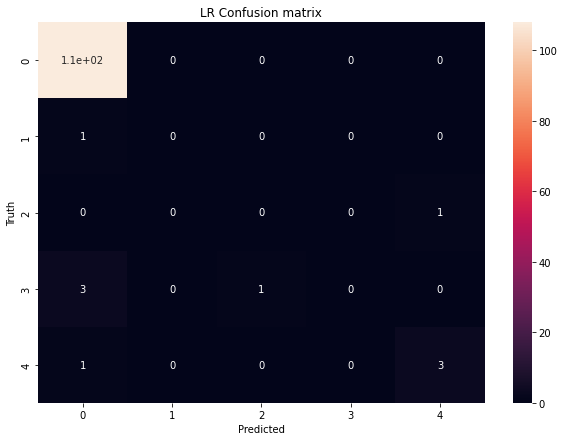

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_prediction)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('LR Confusion matrix')

From the results above, I can see that all of the methods adopted in this study can predict with the same lavel of accuracy (>>90%). The Logistic regression, performs slightly better in terms of score other than approaches do.
However that level of accuracy refers mostly respect to blood donors than hepatitis due to the fact that most of our samples belong to healthy individuals. Few errors appears when it comes of disease data ans seen in the confusion matrix. That means that in order to properly predict the disease we need more samples with that particular disease and less NaN within the dataset